# Primary data description

In [1]:
import pandas as pd

initial_file_path = "data/loan_data_original.csv"
df_init = pd.read_csv(initial_file_path)
print(f"First 5 rows: \n")
df_init.head()


First 5 rows: 



,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [2]:
print(f"Description of numerical data: \n")
df_init.describe()

Description of numerical data: 



,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Comment:
* First we can see that not all data is numerical
* There are outliers (e.g max person_age 144)

To do:
* draw histograms

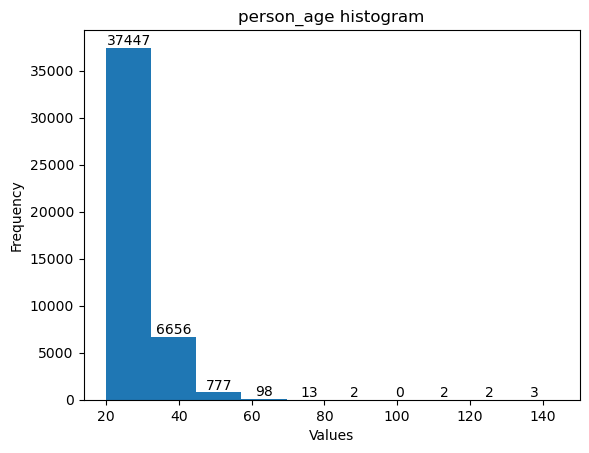

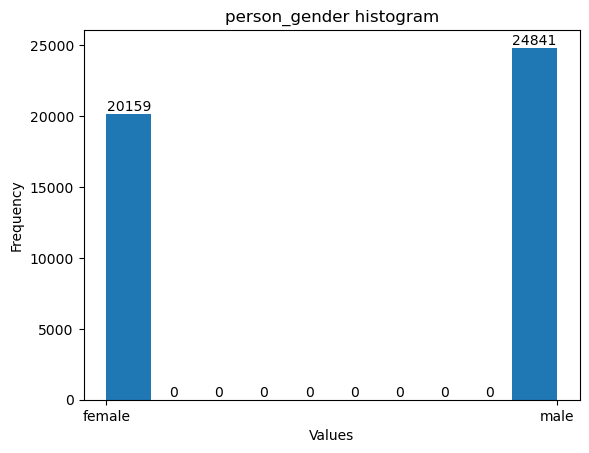

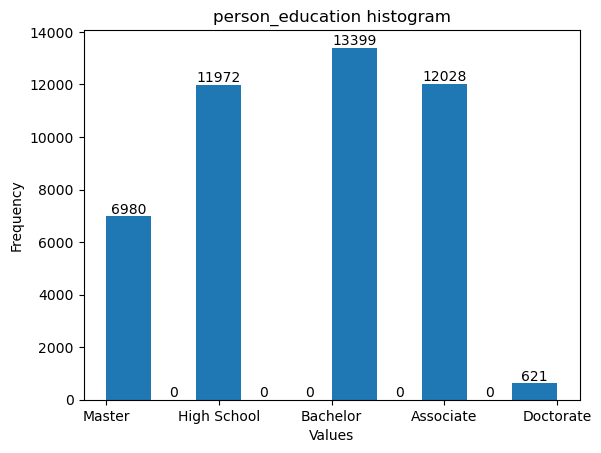

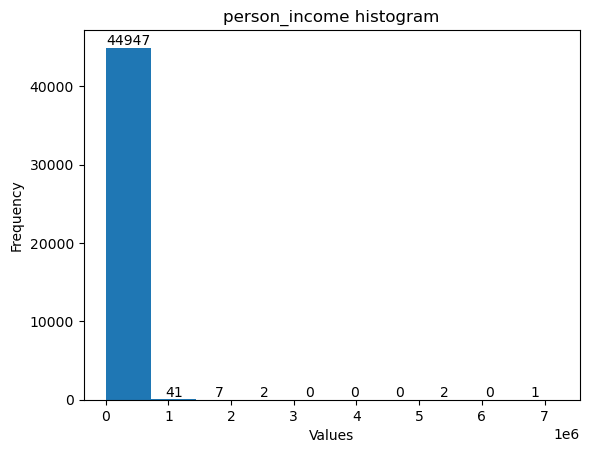

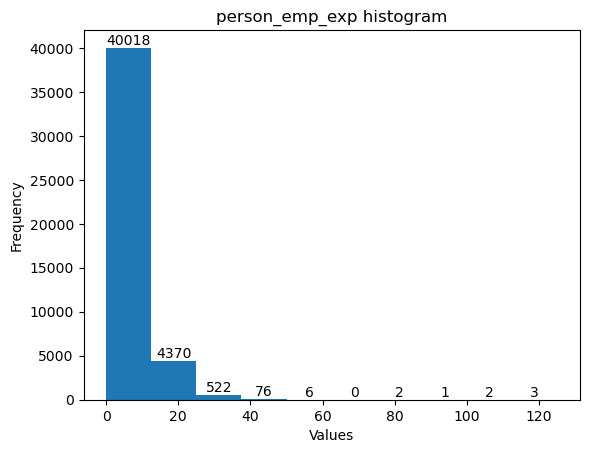

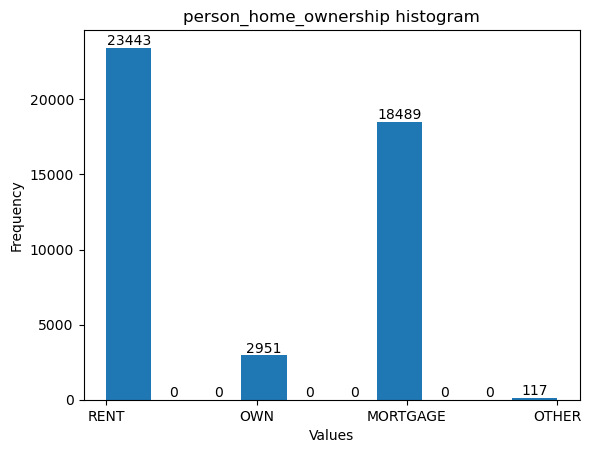

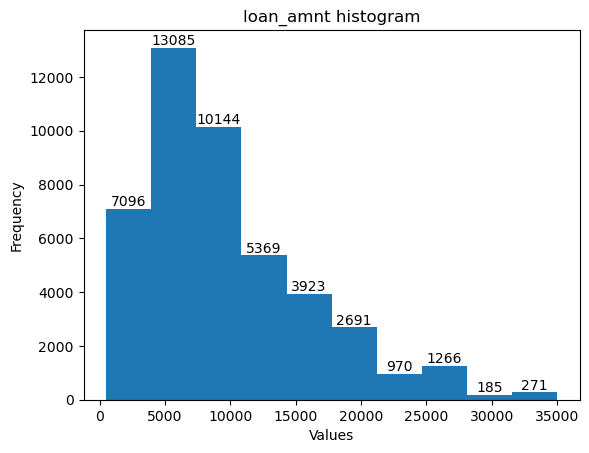

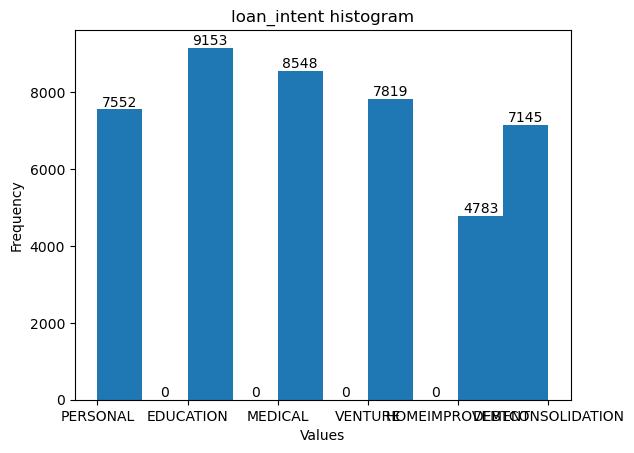

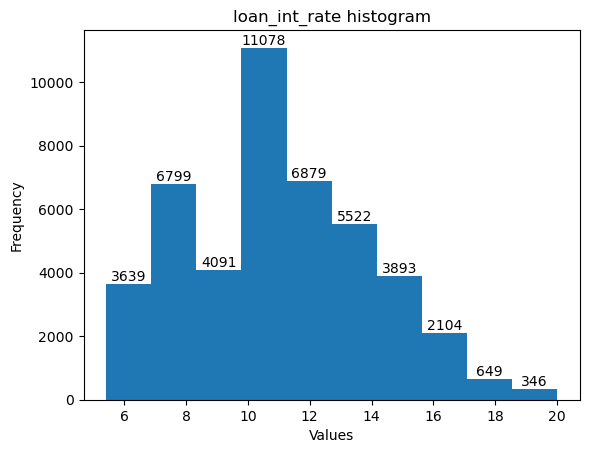

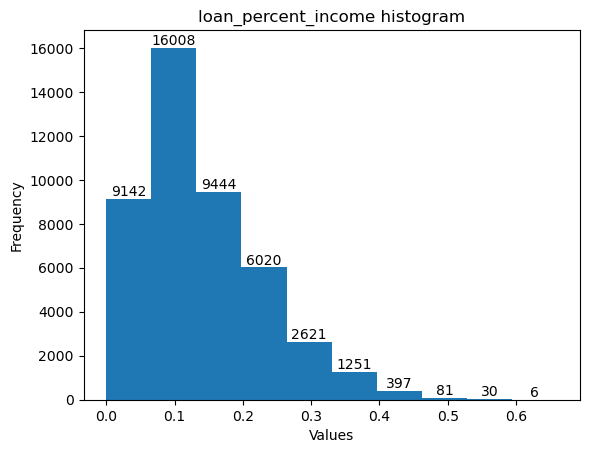

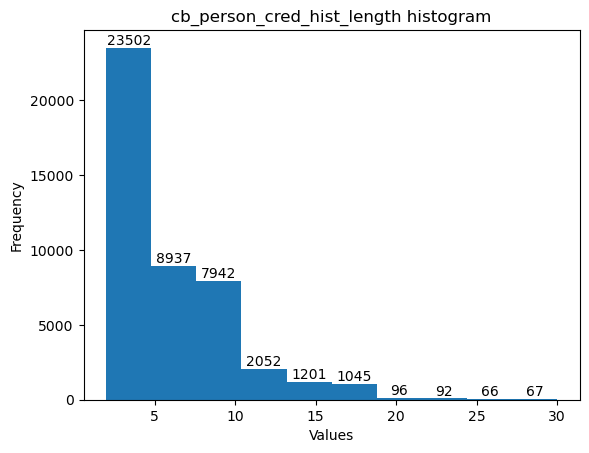

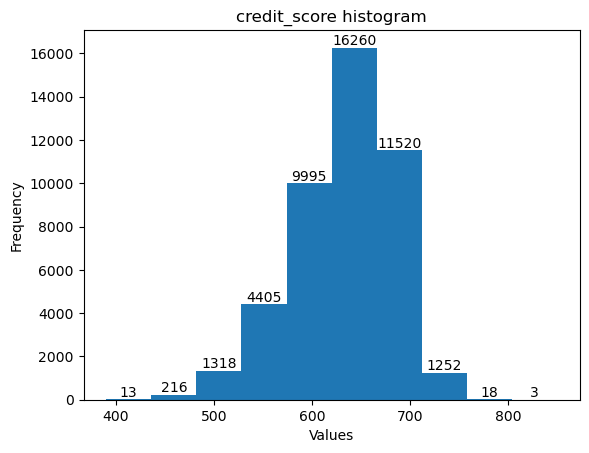

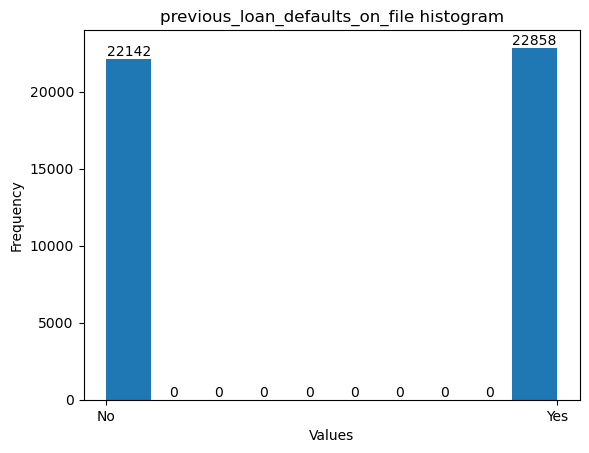

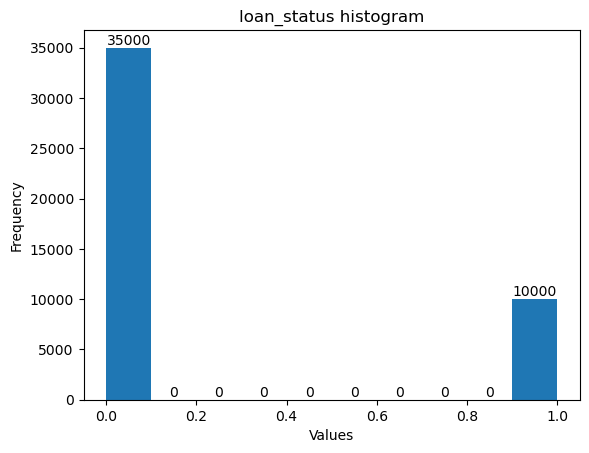

In [ ]:
import matplotlib.pyplot as plt

for col in df_init:
    data = df_init[col]
    counts, edges, bars = plt.hist(data)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title(f"{col} histogram")
    plt.bar_label(bars)
    plt.show()
    

Comment:

1. We can see that the most obvious outliers, which need handling are in columns: 
* person_age
* person_income
* person_emp_exp

2. Now, let's check correlation of features using correlation matrix. But to do this I need to change all categorical features to numeric (done in file categorical_to_numeric.ipynb)

In [20]:
df_numeric = pd.read_csv("data/loan_data_all_numerical.csv")
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,-0.017528,0.052794,0.193698,0.954412,0.037847,0.050750,0.028694,0.013402,-0.043299,0.861985,0.178432,-0.025917,-0.021476
person_gender,-0.017528,1.000000,-0.003099,-0.010173,-0.015078,-0.001507,-0.010647,-0.002883,-0.003662,0.000367,-0.011999,0.000223,-0.000704,0.000561
person_education,0.052794,-0.003099,1.000000,0.002908,0.048639,0.003767,0.004241,0.003583,-0.000525,0.007172,0.052224,-0.015531,0.002373,0.001950
person_income,0.193698,-0.010173,0.002908,1.000000,0.185987,0.216077,0.242290,0.014983,0.001510,-0.234177,0.124316,0.035919,0.061483,-0.135808
person_emp_exp,0.954412,-0.015078,0.048639,0.185987,1.000000,0.035354,0.044589,0.020855,0.016631,-0.039862,0.824272,0.186196,-0.029231,-0.020481
person_home_ownership,0.037847,-0.001507,0.003767,0.216077,0.035354,1.000000,0.148561,0.012976,-0.129622,-0.142674,0.028744,0.005715,0.128954,-0.239517
loan_amnt,0.050750,-0.010647,0.004241,0.242290,0.044589,0.148561,1.000000,0.017300,0.146093,0.593011,0.042969,0.009074,-0.059009,0.107714
loan_intent,0.028694,-0.002883,0.003583,0.014983,0.020855,0.012976,0.017300,1.000000,0.014161,-0.002695,0.019566,0.002044,-0.037213,0.073588
loan_int_rate,0.013402,-0.003662,-0.000525,0.001510,0.016631,-0.129622,0.146093,0.014161,1.000000,0.125209,0.018008,0.011498,-0.181800,0.332005
loan_percent_income,-0.043299,0.000367,0.007172,-0.234177,-0.039862,-0.142674,0.593011,-0.002695,0.125209,1.000000,-0.031868,-0.011483,-0.203252,0.384880


Comment:

* we can see that there is very strong correlation between person_age and person_emp_exp (what is logical)
* there is a strong correlation between person_age and cb_person_cred_hist_length (what is also logical)
* there is a strong correlation between person_emp_exp and cb_person_cred_hist_length

We could get rid of one of those correlaten features (person_age, person_emp_exp or cb_person_cred_hist_length) but this dataset doesn't have so much features, so we shouldn't worry about computational problems.